In [1]:
# Importing libaries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignoring the warnings...
import warnings
warnings.simplefilter('ignore')

In [3]:
# Reading Application dataset...
df=pd.read_csv("application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Reading previous_application.csv...
df1=pd.read_csv("previous_application.csv")
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Checking the Shape of application_data Dataset
df.shape

(307511, 122)

In [6]:
#Checking the Shape of previous_application DataSet
df1.shape

(1670214, 37)

# Data Cleaning on Application Dataset

In [7]:
# Describing each numerical Column of Application Dataset
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
# All the Columns Present in Application Dataset
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [9]:
#Checking the null values
df_null= df.isnull().sum()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df_null

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
#Checking the null values percenntage
df_percent= round((100*df.isnull().sum()/len(df)),2)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df_percent

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [11]:
#Total Number of columns having null values
len(df_percent)

122

In [12]:
df.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [13]:
# Removing null values more than 19%
df=df.loc[:,df.isnull().mean()<= .19]

In [14]:
# Number of columns left after removal of the null values <=19%
len(df.columns)

71

In [15]:
# Checking the data again
round((100*df.isnull().sum()/len(df)),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

# Data Cleaning on Previous_Application Dataset

In [16]:
# Checking the null values in previous dataset
df1_null= df1.isnull().sum()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df1_null

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [17]:
#Checking the null values percenntage
df1_percent= round((100*df1.isnull().sum()/len(df1)),2)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df1_percent

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [18]:
#Total number of columns in previous_application
len(df1.columns)

37

In [19]:
#Removing null values more than 20%
df1=df1.loc[:,df1.isnull().mean()<= .20]

In [20]:
#Number of columns left after removal of the null values <=20% 
len(df1.columns)

23

In [21]:
#checking the data again
round((100*df1.isnull().sum()/len(df1)),2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

In previous_application dataset seemes no such null values ,so there is no lookup

# Imputing the Missing Values

 Imputing the Missing Values in Application Dataset

In [22]:
# Imputing the missing Values in Name_Type_Suite Column.
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [23]:
# Checking the mode value in the NAME_TYPE_SUITE column..
df['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [24]:
# Filling the 'NAME_TYPE_SUITE' column with the mode value i.e 'Unaccompanied' , as it the most occuring value in the column
df['NAME_TYPE_SUITE'].fillna(value = 'Unaccompanied', inplace = True)

 Imputing the Missing Values in the Numerical columns

In [25]:
#Checking the mean value in AMT_REQ_CREDIT_BUREAU_HOUR column.
df.AMT_REQ_CREDIT_BUREAU_HOUR.mean()

0.006402448193930645

In [26]:
#Filling the AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_HEQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, 
#AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR with '0' as the most of the values are '0' in the columns.
df.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR']=df.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

In [27]:
#Checking the AMT_GOODS_PRICE Column
df.AMT_GOODS_PRICE.mean()

538396.2074288895

In [28]:
# we can impute the mean value of AMT_GOODS_PRICE.
df['AMT_GOODS_PRICE'].fillna(df.AMT_GOODS_PRICE.mean(),inplace=True)

In [29]:
#Since the column has an outlier, so replacing the null values with the mean values would be proven harmful for the analysis,replacing it with median values.
df['AMT_ANNUITY'].fillna(df.AMT_ANNUITY.median(),inplace=True )

In [30]:
#Rechecking the data again for null values
round((100*df.isnull().sum()/len(df)),2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

# Checking The data types of the Column

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [32]:
# Converting the data types of some of the columns that shouldn't be float data type.
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].astype(int,errors='ignore')
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype(int,errors='ignore')
df['OBS_30_CNT_SOCIAL_CIRCLE'] = df['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
df['DEF_30_CNT_SOCIAL_CIRCLE'] = df['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
df['OBS_60_CNT_SOCIAL_CIRCLE'] = df['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
df['DEF_60_CNT_SOCIAL_CIRCLE'] = df['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
df['AMT_REQ_CREDIT_BUREAU_HOUR'] = df['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int,errors='ignore')
df['AMT_REQ_CREDIT_BUREAU_DAY'] = df['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int,errors='ignore')
df['AMT_REQ_CREDIT_BUREAU_WEEK'] = df['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int,errors='ignore')
df['AMT_REQ_CREDIT_BUREAU_MON'] = df['AMT_REQ_CREDIT_BUREAU_MON'].astype(int,errors='ignore')
df['AMT_REQ_CREDIT_BUREAU_QRT'] = df['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int,errors='ignore')
df['AMT_REQ_CREDIT_BUREAU_YEAR'] = df['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int,errors='ignore')

# Removing the unwanted columns from the application_dataset

In [33]:
#we will remove the unwanted columns from the application_dataset
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted,axis=1,inplace=True)

# Checking the gender and Organization column for any error

In [34]:
#Checking the Gender  column first
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [35]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [36]:
# Checking the organization column

df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [37]:
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column

df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 41)

# Creaing bins for the 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [38]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [39]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

# Checking for the Imbalance Ratio

In [40]:
# Have a look into the Target data
df.TARGET.value_counts()

0    230302
1     21835
Name: TARGET, dtype: int64

<b>Here,'Target= 0' means the people those who are non-defaulters</b>

<b>Here,'Target= 1' means the people those who are defaulters</b>

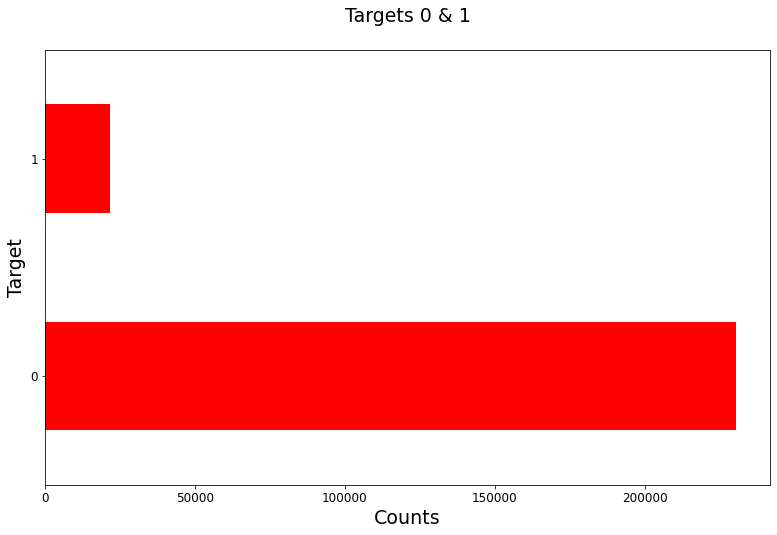

In [41]:
# Plotting for the Target
plt.figure(figsize=[13,8])
df.TARGET.value_counts().plot.barh(color='Red')
    
plt.title('Targets 0 & 1\n',fontsize=19)
plt.xlabel('Counts',fontsize=19)
plt.ylabel('Target',fontsize=19)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [42]:
#Checking the Imbalance ratio for rhe Target Column
target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]
a=round(len(target0_df)/len(target1_df),2)
print('The Imbalance ratio is',a)

The Imbalance ratio is 10.55


# Univariate Analysis

<b>Plotting a bar chart for those having no difficulties in re-paying the loan i.e. the Target = 0 people</b>

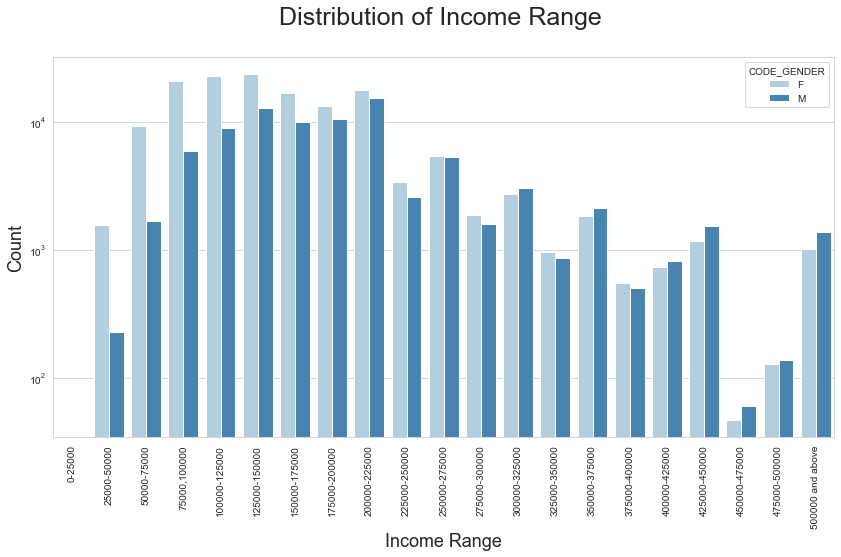

In [43]:
#Potting for Income Range across various Gender.

plt.figure(figsize=[14,7])
sns.set_style('whitegrid')
sns.countplot(data=target0_df, x='AMT_INCOME_RANGE', hue='CODE_GENDER', palette='Blues')

plt.xticks(rotation=90)
plt.title('Distribution of Income Range \n' , fontsize=25)
plt.xlabel('Income Range',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.yscale('log')

plt.show()

<b>Conclusion from the graph:</b>

1. Female counts are higher than male.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that females are more than male in having credits for that range.
4. Very less count for income range 400000 and above.

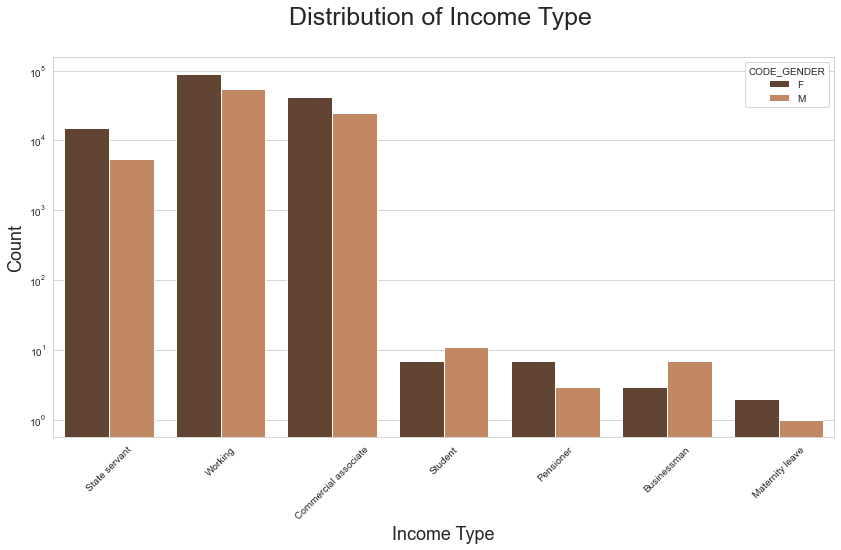

In [44]:
#Plotting for the Various Income types across various Gender 

plt.figure(figsize=[14,7])
sns.set_style('whitegrid')
sns.countplot(data=target0_df, x='NAME_INCOME_TYPE', hue='CODE_GENDER', palette='copper')

plt.xticks(rotation=45)
plt.title('Distribution of Income Type \n' , fontsize=25)
plt.xlabel('Income Type',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.yscale('log')

plt.show()

<b>Conclusion from the graph</b>

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’

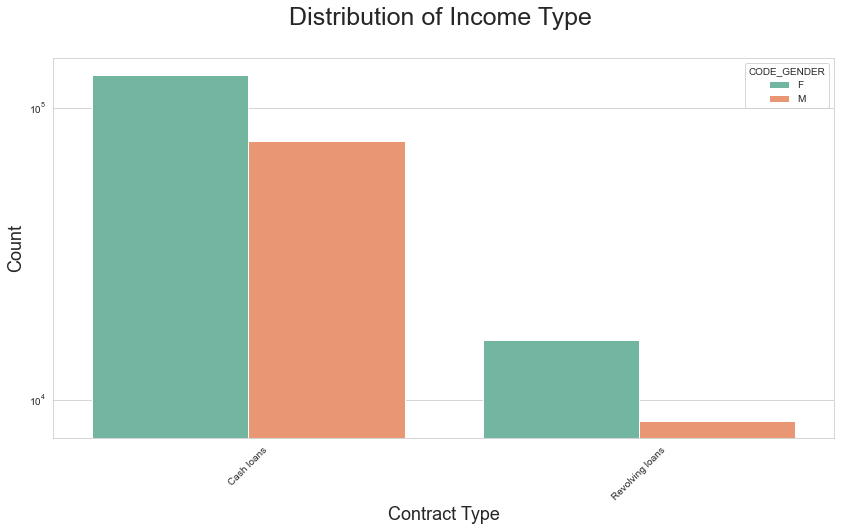

In [45]:
# Plotting for Contract type
plt.figure(figsize=[14,7])
sns.set_style('whitegrid')
sns.countplot(data=target0_df, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette='Set2')

plt.xticks(rotation=45)
plt.title('Distribution of Income Type \n' , fontsize=25)
plt.xlabel('Contract Type',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.yscale('log')
plt.show()

<b>Conclusion from the graph</b>

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.

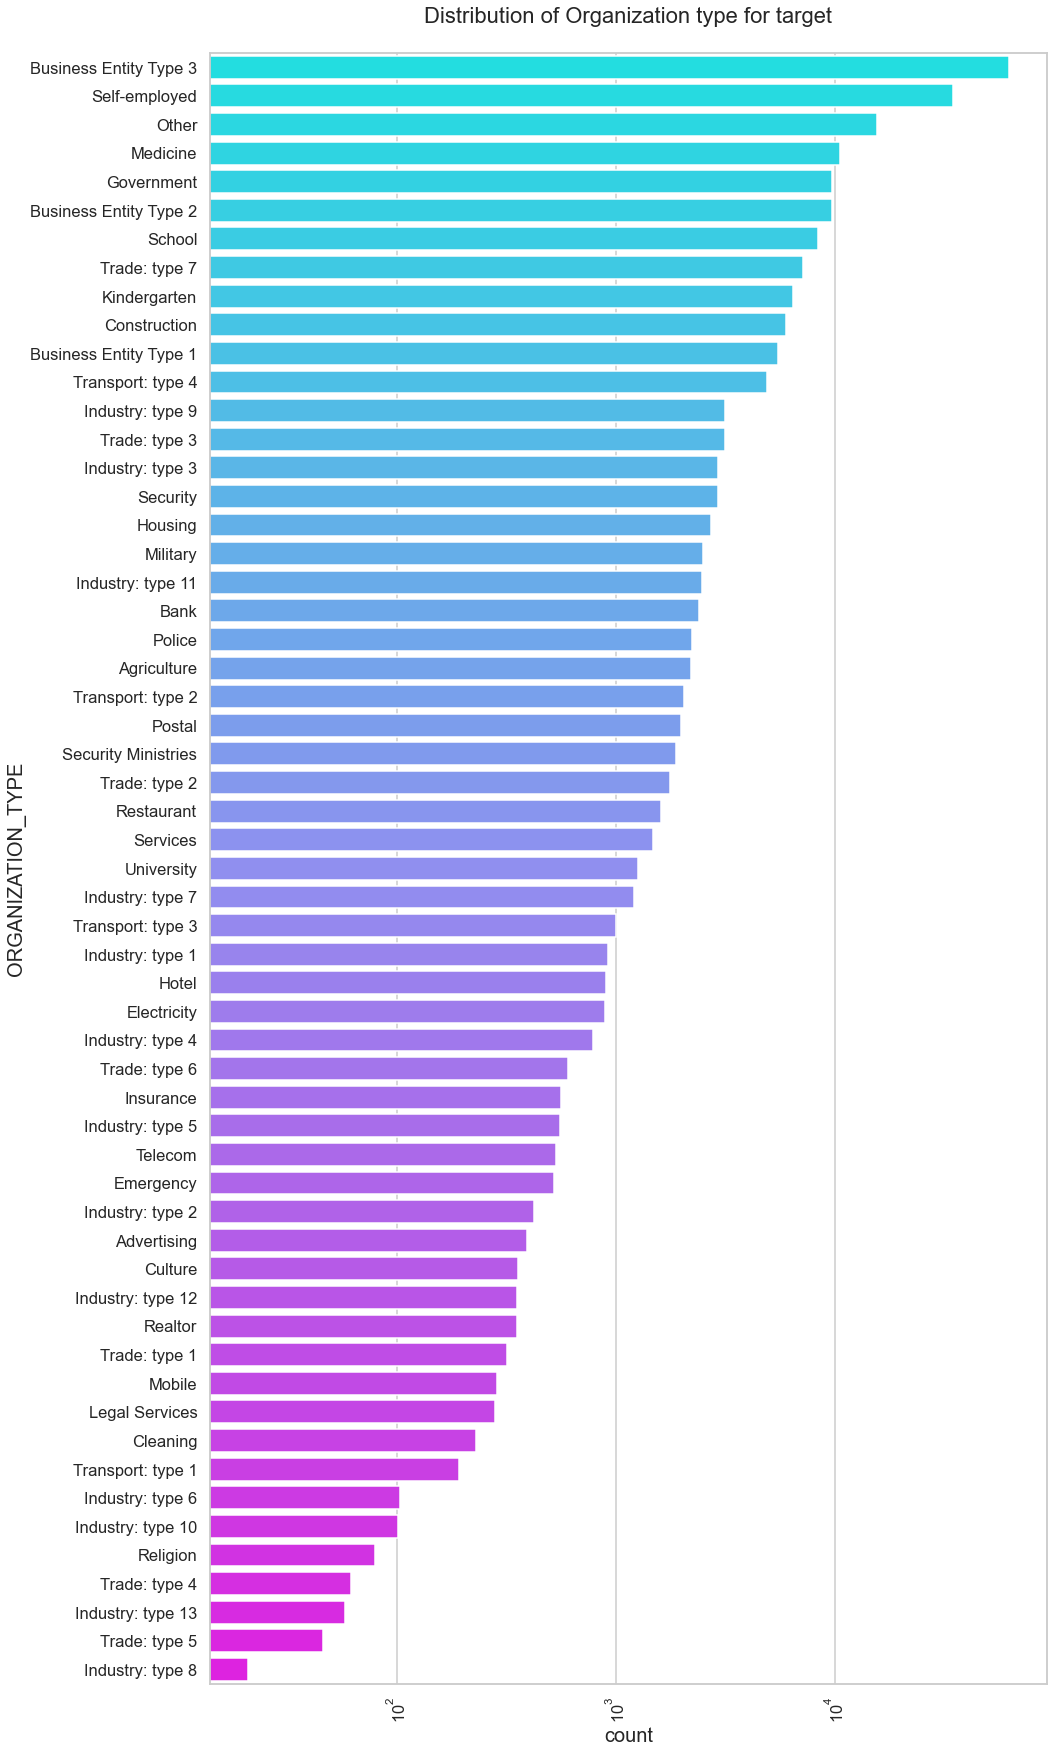

In [46]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

<b>Conclusion from the graph</b>

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

<b>Plotting a bar chart for those having no difficulties in re-paying the loan i.e. the Target = 0 people</b>

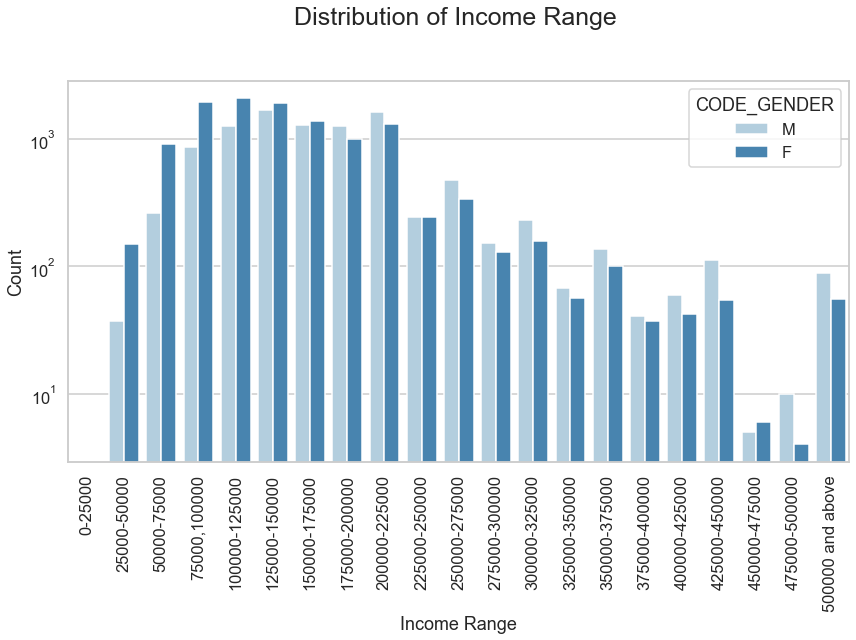

In [47]:
#Potting for Income Range across various Gender.

plt.figure(figsize=[14,7])
sns.set_style('whitegrid')
sns.countplot(data=target1_df, x='AMT_INCOME_RANGE', hue='CODE_GENDER', palette='Blues')

plt.xticks(rotation=90)
plt.title('Distribution of Income Range \n' , fontsize=25)
plt.xlabel('Income Range',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.yscale('log')

plt.show()

<b>Conclusion from the graph</b>

1. Male counts are higher than female.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that males are more than female in having credits for that range.
4. Very less count for income range 400000 and above.

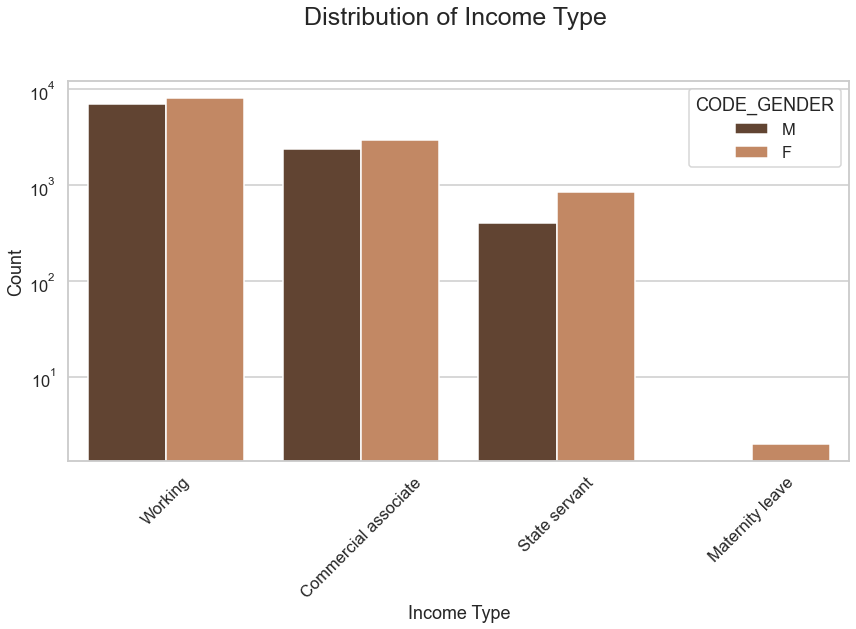

In [48]:
#Plotting for the Various Income types across various Gender 

plt.figure(figsize=[14,7])
sns.set_style('whitegrid')
sns.countplot(data=target1_df, x='NAME_INCOME_TYPE', hue='CODE_GENDER', palette='copper')

plt.xticks(rotation=45)
plt.title('Distribution of Income Type \n' , fontsize=25)
plt.xlabel('Income Type',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.yscale('log')

plt.show()

<b>Conclusion from the graph</b>

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e. ‘Maternity leave.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type ‘Maternity leave’.
4. For type 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

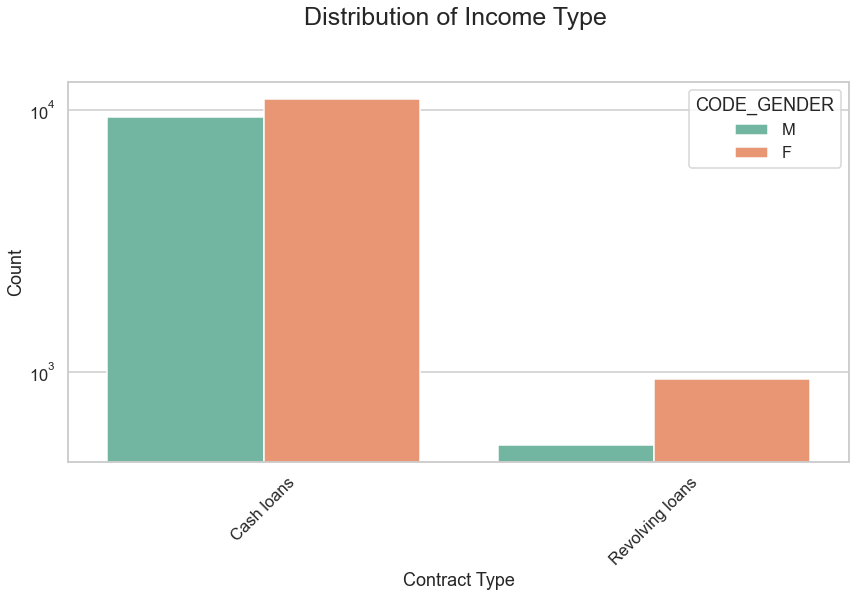

In [49]:
# Plotting for Contract type
plt.figure(figsize=[14,7])
sns.set_style('whitegrid')
sns.countplot(data=target1_df, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette='Set2')

plt.xticks(rotation=45)
plt.title('Distribution of Income Type \n' , fontsize=25)
plt.xlabel('Contract Type',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.yscale('log')
plt.show()

<b>Conclusion from the graph</b>

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.
3. For type 1 : there is only Female Revolving loans.

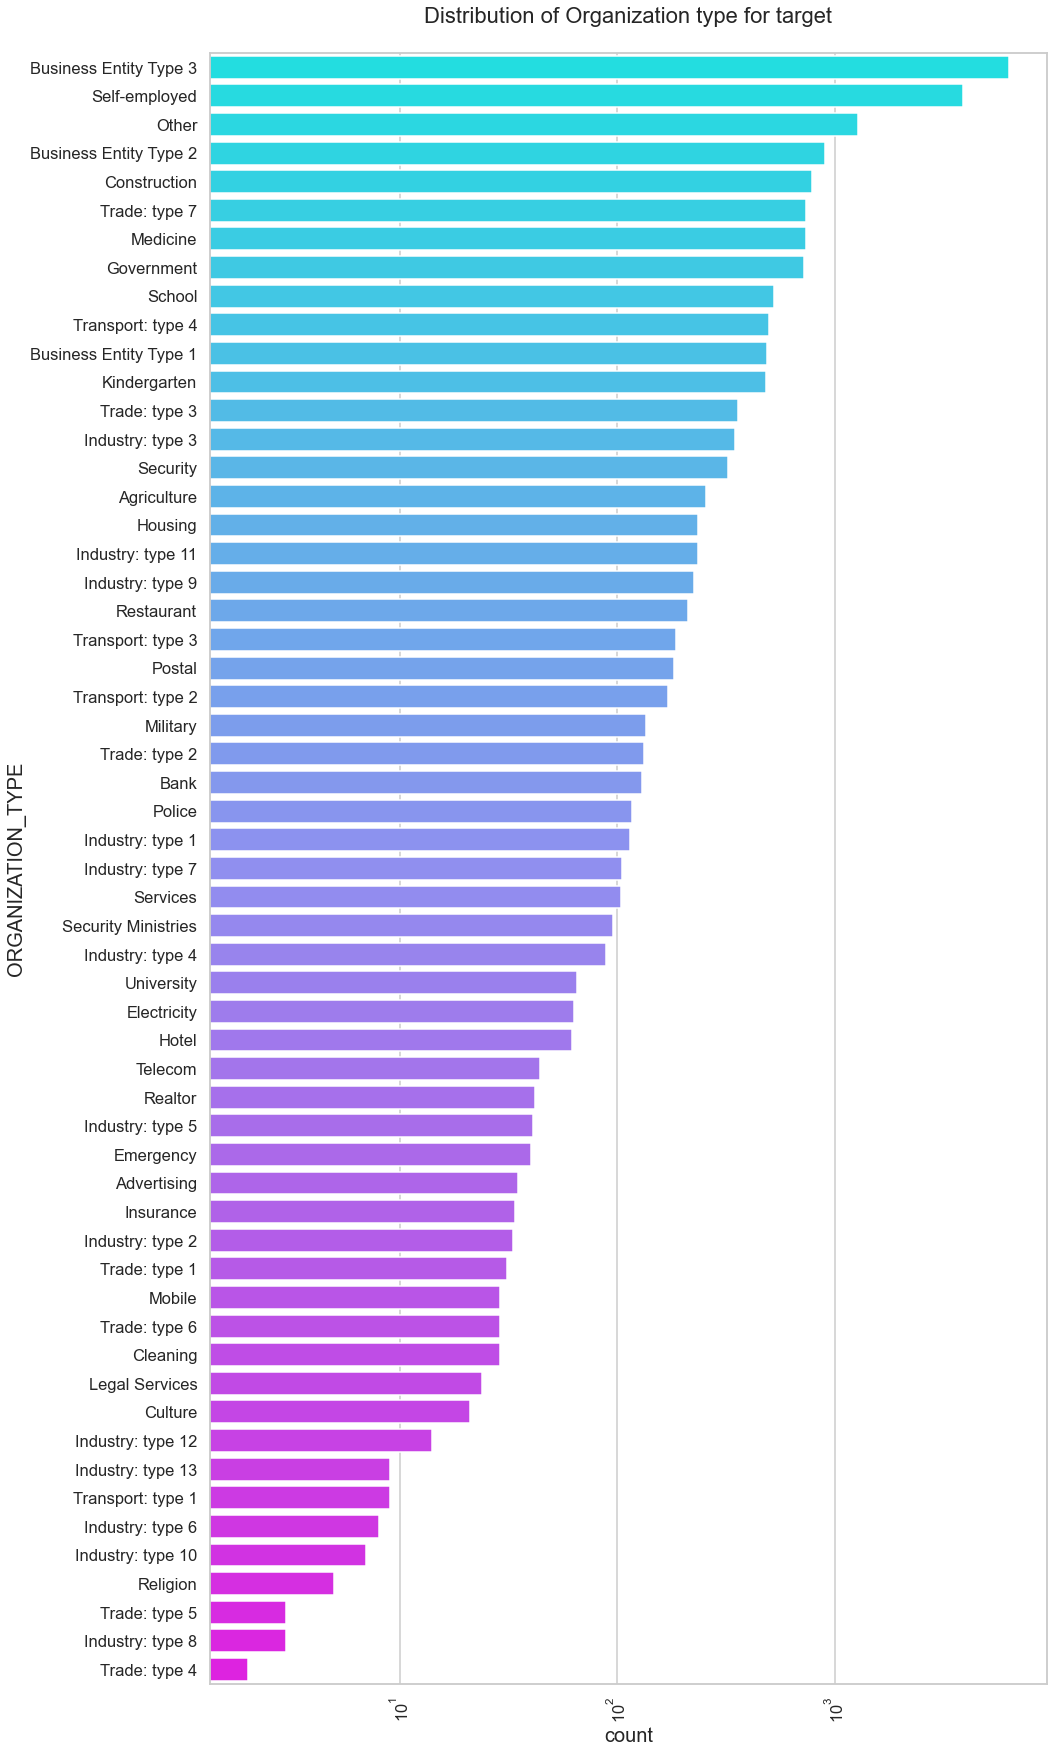

In [50]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target1_df,y='ORGANIZATION_TYPE',order=target1_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

<b>Conclusion from the graph</b>

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
3. Same as type 0 in distribution of organization type.

# Defining the Correlation

In [51]:
#Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [52]:
# Correlation for target 0

target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.027052,-0.030579,0.266534,0.030948,0.155518,-0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295,-0.027456,0.026816,0.005460,0.026536,0.003688,0.000606,0.001692,0.000941,-0.008106,0.002736,-0.018460
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.408040,0.110074,-0.054666,-0.060868,0.040559,-0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758,0.184161,-0.036970,-0.034036,-0.036669,-0.034723,0.004924,0.009163,0.014558,0.076992,0.039499,0.080819
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.984033,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194,0.137629,-0.001623,-0.018819,-0.001530,-0.021286,-0.002374,0.001759,-0.002170,0.047880,0.035164,-0.006450
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.823174,0.064328,-0.100287,-0.074643,0.010712,-0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087,0.131526,-0.014584,-0.019623,-0.014335,-0.022262,0.004442,0.003250,0.013836,0.046751,0.029582,0.014437
AMT_GOODS_PRICE,-0.027052,0.408040,0.984033,0.823174,1.000000,0.069793,-0.168821,-0.109273,-0.014991,-0.039750,0.045046,0.016769,0.043012,0.045777,-0.041907,-0.039530,-0.013186,0.146164,-0.002411,-0.019918,-0.002277,-0.021772,-0.001566,0.001898,-0.001235,0.049056,0.036305,-0.007784
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,0.069793,1.000000,-0.041663,0.000900,-0.042400,-0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332,0.197647,0.009504,0.027468,0.010062,0.021781,-0.003682,-0.000246,-0.004457,0.048260,-0.003077,0.002148
DAYS_BIRTH,0.266534,-0.054666,-0.169030,-0.100287,-0.168821,-0.041663,1.000000,0.307787,0.265449,0.083331,0.051299,0.058627,0.038104,0.012789,0.167477,0.111539,0.029007,-0.149414,0.032435,0.021416,0.032063,0.021419,0.000058,0.002241,-0.004447,-0.025279,-0.009001,-0.067159
DAYS_EMPLOYED,0.030948,-0.060868,-0.104251,-0.074643,-0.109273,0.000900,0.307787,1.000000,0.126708,0.106823,0.026444,0.065435,0.086966,0.063533,0.118224,0.125954,0.069567,-0.098996,0.000300,0.007688,0.000391,0.008224,-0.005310,-0.001721,-0.006400,-0.035993,-0.011668,-0.052996
DAYS_REGISTRATION,0.155518,0.040559,-0.015318,0.010712,-0.014991,-0.042400,0.265449,0.126708,1.000000,0.036788,-0.029553,0.017715,0.015092,0.007716,0.038064,0.047339,0.027231,-0.073655,0.019637,0.008927,0.019418,0.008576,-0.003460,0.000961,-0.001140,-0.013049,0.003547,-0.016608
DAYS_ID_PUBLISH,-0.119164,-0.036702,-0.038197,-0.027354,-0.039750,-0.010299,0.083331,0.106823,0.036788,1.000000,0.008538,0.027302,0.020823,0.008525,0.054875,0.033427,0.001476,-0.059711,-0.002631,0.010355,-0.003236,0.012305,0.001568,-0.002437,-0.009794,-0.036786,-0.021602,-0.066387


In [53]:
# Correlation for target 

target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.005770,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557,-0.014702,0.034901,-0.001687,0.034091,-0.003596,-0.000694,-0.006995,0.001612,-0.017158,-0.008893,-0.012105
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.368667,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230,0.151537,-0.006082,-0.026784,-0.006269,-0.028520,0.011622,-0.001456,0.028747,0.089452,0.041152,0.112054
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.974837,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465,0.120180,0.016914,-0.028261,0.016878,-0.033856,0.004104,-0.003968,0.010071,0.052620,0.000441,0.016708
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.804944,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012,0.115647,0.004732,-0.022101,0.005796,-0.026456,0.012842,-0.002594,0.035096,0.061380,0.006869,0.013577
AMT_GOODS_PRICE,-0.005770,0.368667,0.974837,0.804944,1.000000,0.058228,-0.198841,-0.116109,-0.023071,-0.069116,0.037360,0.018389,0.036771,0.037990,-0.031782,-0.034261,-0.012346,0.132846,0.018783,-0.025407,0.018735,-0.030543,0.006902,-0.004200,0.012806,0.056578,0.003786,0.017497
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,0.058228,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753,0.146325,0.029384,0.046274,0.028805,0.035418,-0.003928,0.002324,0.003947,0.048091,-0.006460,0.017721
DAYS_BIRTH,0.175025,-0.103026,-0.200718,-0.100200,-0.198841,-0.044444,1.000000,0.256870,0.192350,0.146246,0.041994,0.046320,0.022208,0.000356,0.145884,0.096181,0.009633,-0.148767,0.003336,0.018240,0.002628,0.022451,0.012227,0.007481,-0.001083,-0.024892,-0.017110,-0.097258
DAYS_EMPLOYED,0.006823,-0.053798,-0.107605,-0.060193,-0.116109,-0.015246,0.256870,1.000000,0.086286,0.104244,0.010328,0.069566,0.082264,0.056081,0.118869,0.139863,0.069316,-0.092893,-0.024303,0.006929,-0.024561,0.009199,0.006285,0.009197,-0.000398,-0.026432,-0.002689,-0.078984
DAYS_REGISTRATION,0.110854,0.011378,-0.021973,0.019762,-0.023071,-0.033490,0.192350,0.086286,1.000000,0.061563,-0.044753,0.006362,0.000896,-0.001416,0.015831,0.039204,0.026105,-0.074527,0.022984,0.012926,0.022657,0.010911,0.000544,0.003785,0.006148,0.007641,-0.006208,-0.016410
DAYS_ID_PUBLISH,-0.091042,-0.051113,-0.065143,-0.044128,-0.069116,-0.017779,0.146246,0.104244,0.061563,1.000000,0.012709,0.024860,0.013162,0.002567,0.048184,0.015838,-0.015598,-0.066761,-0.013372,0.013556,-0.012960,0.012582,0.000187,-0.014254,-0.002254,-0.035169,-0.007332,-0.089659


In [54]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

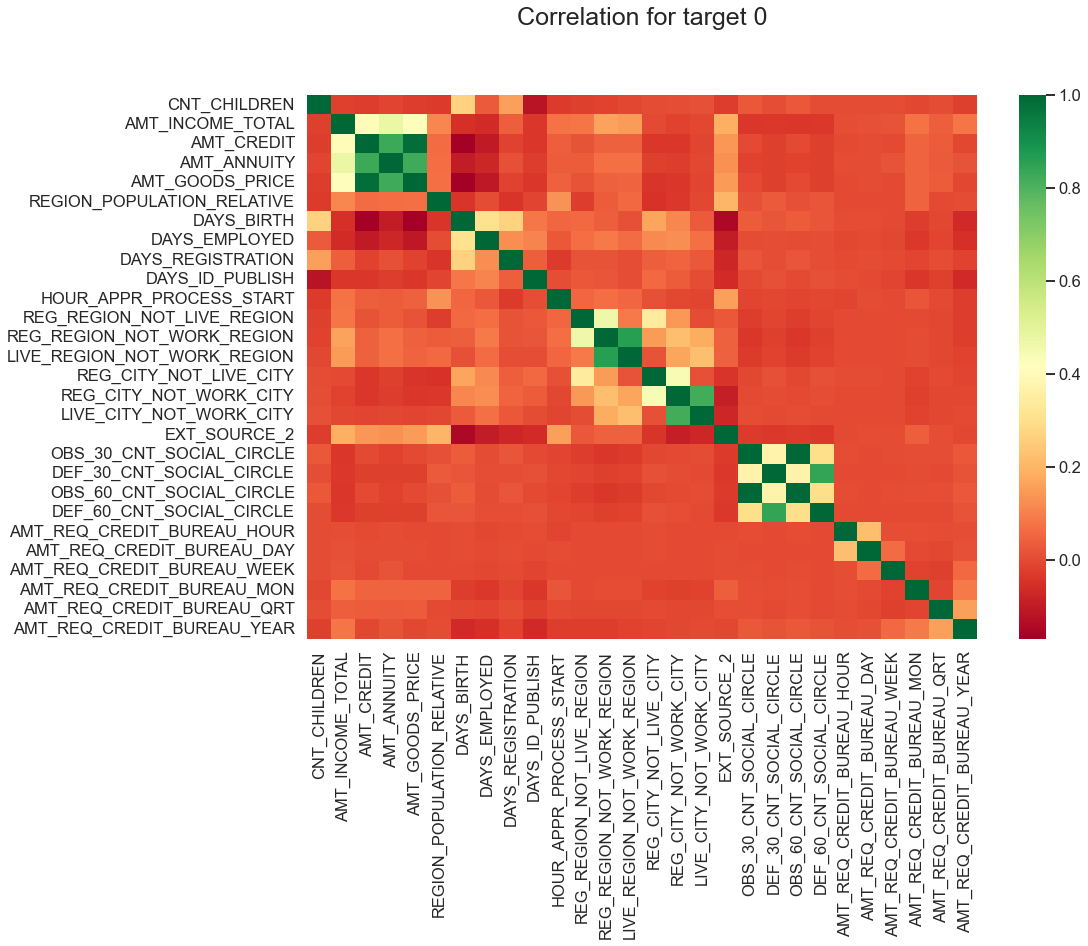

In [55]:
# For Target 0

targets_corr(data=target0,title='Correlation for target 0')

<b>Conclusion from the graph</b>

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4. less children client have in densely populated area.
5. Credit amount is higher to densely populated area.
6. The income is also higher in densely populated area.

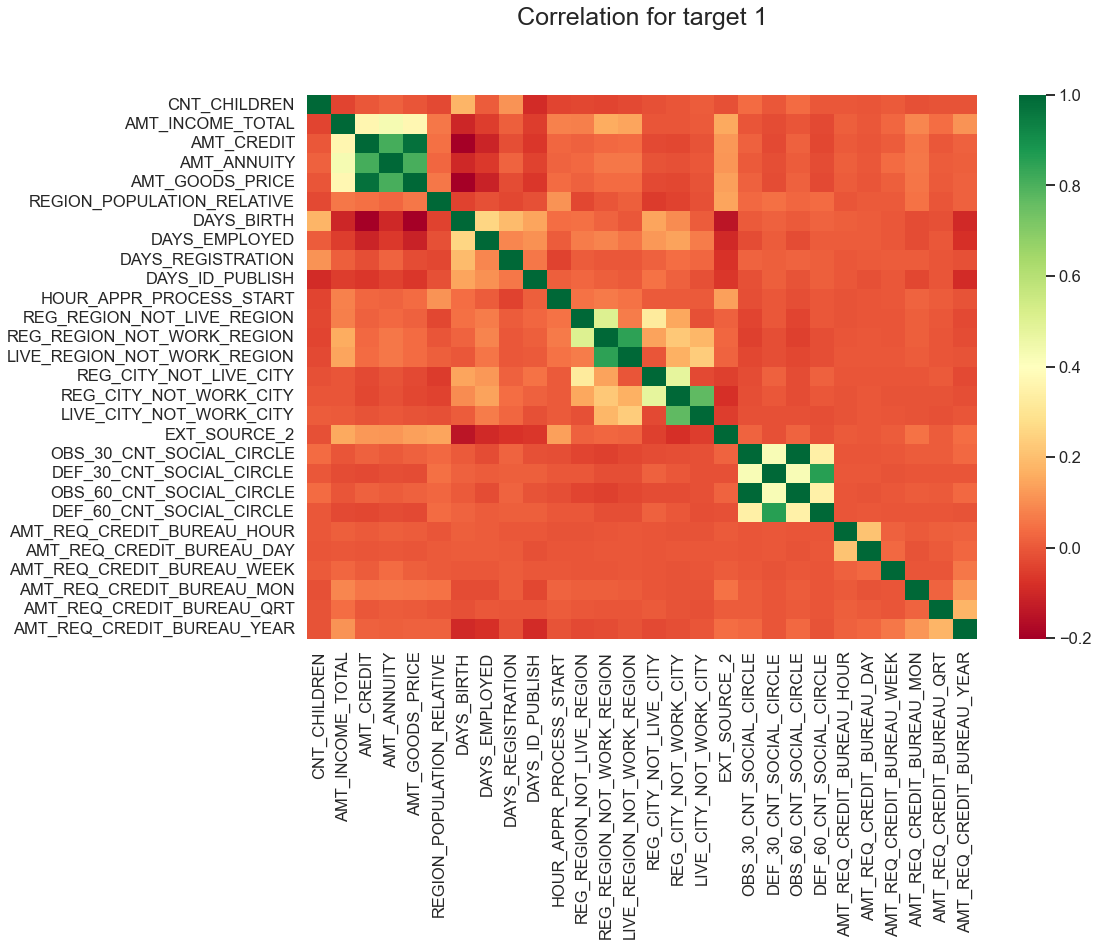

In [56]:
# For Target 1

targets_corr(data=target1,title='Correlation for target 1')

<b>Conclusion from the graph</b>

1. The client's permanent address does not match contact address are having less children and vice-versa
2. The client's permanent address does not match work address are having less children and vice-versa

# Finding the Top 10 correlation for Target 0  and Target 1

In [57]:
#Finding the Top 10 correlation for Target =0
target0= target0_df.iloc[0:,2:].corr()
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.009826,-0.018704,-0.007612,-0.022277,-0.030352,0.242462,0.063036,0.162900,-0.117746,-0.033031,-0.023033,-0.016798,-0.006946,-0.001566,0.010369,0.018414,-0.026134,0.019388,0.003419,0.019062,0.002384,-0.001019,0.000660,0.000047,-0.017476,-0.000453,-0.020784
AMT_INCOME_TOTAL,-0.009826,1.000000,0.326155,0.400752,0.333217,0.169306,-0.045543,-0.030102,0.034508,-0.026462,0.055934,0.064868,0.129765,0.121288,-0.004264,-0.020260,-0.011238,0.137752,-0.030661,-0.027914,-0.030477,-0.027415,0.002664,0.009039,0.009068,0.054560,0.016234,0.038459
AMT_CREDIT,-0.018704,0.326155,1.000000,0.762103,0.986315,0.103876,-0.152659,-0.087500,-0.015180,-0.034914,0.040390,0.020979,0.050597,0.052028,-0.037527,-0.038517,-0.014834,0.136033,-0.003803,-0.022223,-0.003770,-0.024255,-0.002694,0.006213,0.000279,0.054174,0.022967,-0.027913
AMT_ANNUITY,-0.007612,0.400752,0.762103,1.000000,0.766464,0.122206,-0.091571,-0.052470,0.009814,-0.025990,0.034038,0.039753,0.076045,0.071623,-0.018912,-0.028971,-0.014268,0.126979,-0.016426,-0.023286,-0.016241,-0.024129,0.003876,0.003148,0.013904,0.033052,0.014217,-0.001546
AMT_GOODS_PRICE,-0.022277,0.333217,0.986315,0.766464,1.000000,0.106988,-0.146764,-0.088601,-0.011840,-0.036679,0.049964,0.023522,0.052040,0.052319,-0.036935,-0.039240,-0.015803,0.142436,-0.003960,-0.023445,-0.003970,-0.025066,-0.002259,0.006563,0.000791,0.055770,0.023351,-0.030615
REGION_POPULATION_RELATIVE,-0.030352,0.169306,0.103876,0.122206,0.106988,1.000000,-0.041138,0.008663,-0.059696,-0.004014,0.174754,-0.003262,0.065822,0.092300,-0.053687,-0.049449,-0.017033,0.207116,-0.013763,0.005047,-0.013241,0.000658,-0.001447,0.001957,-0.003770,0.074797,-0.002376,-0.003650
DAYS_BIRTH,0.242462,-0.045543,-0.152659,-0.091571,-0.146764,-0.041138,1.000000,0.352662,0.299000,0.108050,0.048619,0.058344,0.039298,0.014175,0.165505,0.112517,0.031121,-0.142263,0.019531,0.015212,0.019128,0.015897,-0.000236,0.001093,-0.003593,-0.033796,-0.008802,-0.069111
DAYS_EMPLOYED,0.063036,-0.030102,-0.087500,-0.052470,-0.088601,0.008663,0.352662,1.000000,0.172102,0.086679,0.022200,0.056714,0.082435,0.063205,0.112019,0.125791,0.074665,-0.081558,-0.000752,0.007447,-0.000811,0.009392,-0.003171,0.000872,-0.001395,-0.029415,-0.002094,-0.024442
DAYS_REGISTRATION,0.162900,0.034508,-0.015180,0.009814,-0.011840,-0.059696,0.299000,0.172102,1.000000,0.029895,-0.031501,0.020549,0.017588,0.009254,0.047235,0.055274,0.031350,-0.071737,0.016317,0.007925,0.016130,0.008158,-0.002818,0.000637,-0.000589,-0.020348,0.002215,-0.018025
DAYS_ID_PUBLISH,-0.117746,-0.026462,-0.034914,-0.025990,-0.036679,-0.004014,0.108050,0.086679,0.029895,1.000000,0.005436,0.026744,0.020968,0.008941,0.053424,0.033071,0.001767,-0.059634,-0.008769,0.008669,-0.009280,0.010258,0.001470,-0.003028,-0.009028,-0.030810,-0.014189,-0.056114


In [58]:
#Converting the negative values to postive values and sorting the value
corr_0=target0.abs().unstack().sort_values(kind='quicksort').dropna()
corr_0=corr_0[corr_0 !=1.0]
corr_0

AMT_REQ_CREDIT_BUREAU_WEEK   CNT_CHILDREN                   0.000047
CNT_CHILDREN                 AMT_REQ_CREDIT_BUREAU_WEEK     0.000047
OBS_60_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_HOUR     0.000071
AMT_REQ_CREDIT_BUREAU_HOUR   OBS_60_CNT_SOCIAL_CIRCLE       0.000071
DEF_60_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_WEEK     0.000095
AMT_REQ_CREDIT_BUREAU_WEEK   DEF_60_CNT_SOCIAL_CIRCLE       0.000095
AMT_REQ_CREDIT_BUREAU_HOUR   OBS_30_CNT_SOCIAL_CIRCLE       0.000204
OBS_30_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_HOUR     0.000204
AMT_REQ_CREDIT_BUREAU_WEEK   DEF_30_CNT_SOCIAL_CIRCLE       0.000210
DEF_30_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_WEEK     0.000210
AMT_REQ_CREDIT_BUREAU_HOUR   DAYS_BIRTH                     0.000236
DAYS_BIRTH                   AMT_REQ_CREDIT_BUREAU_HOUR     0.000236
AMT_REQ_CREDIT_BUREAU_WEEK   REG_REGION_NOT_LIVE_REGION     0.000262
REG_REGION_NOT_LIVE_REGION   AMT_REQ_CREDIT_BUREAU_WEEK     0.000262
AMT_CREDIT                   AMT_R

In [59]:
corr_0.tail(10)

LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.820828
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.820828
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.860421
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860421
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.861454
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.861454
AMT_CREDIT                   AMT_GOODS_PRICE                0.986315
AMT_GOODS_PRICE              AMT_CREDIT                     0.986315
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998491
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998491
dtype: float64

In [60]:
#Finding the Top 10 correlation for Target =1
target1= target1_df.iloc[0:,2:].corr()
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.001872,-0.002074,0.015653,-0.007707,-0.032019,0.176563,0.032627,0.126411,-0.089861,-0.038923,-0.032465,-0.039498,-0.028031,-0.019278,-0.000876,0.016332,-0.010600,0.028712,0.002959,0.027955,-0.003220,-0.001269,-0.008695,-0.006195,-0.015163,-0.011841,-0.015698
AMT_INCOME_TOTAL,0.001872,1.000000,0.036484,0.043358,0.036086,0.008476,-0.007822,-0.000039,-0.003959,-0.008858,0.012520,0.006951,0.013245,0.012287,-0.003664,-0.006886,-0.004401,0.006201,-0.005866,-0.005849,-0.005765,-0.005282,0.000925,-0.000071,0.000885,0.005141,0.000607,0.005657
AMT_CREDIT,-0.002074,0.036484,1.000000,0.748708,0.982239,0.069220,-0.189512,-0.106003,-0.033250,-0.062405,0.029054,0.020083,0.035695,0.035966,-0.035325,-0.041392,-0.017875,0.126885,0.015835,-0.031869,0.016319,-0.035170,-0.005051,-0.000943,0.013307,0.061456,-0.003275,-0.008383
AMT_ANNUITY,0.015653,0.043358,0.748708,1.000000,0.748651,0.074406,-0.090497,-0.049032,0.014302,-0.044289,0.022524,0.033311,0.063242,0.061609,-0.013834,-0.019728,-0.006806,0.120642,-0.000018,-0.024644,0.001216,-0.027918,0.010425,-0.001406,0.034566,0.051267,-0.002792,-0.003192
AMT_GOODS_PRICE,-0.007707,0.036086,0.982239,0.748651,1.000000,0.076210,-0.185486,-0.111906,-0.032067,-0.064666,0.042280,0.023532,0.039387,0.038453,-0.035652,-0.041491,-0.017052,0.137716,0.016710,-0.027045,0.017255,-0.029544,-0.004194,0.000755,0.015111,0.064831,-0.002224,-0.011406
REGION_POPULATION_RELATIVE,-0.032019,0.008476,0.069220,0.074406,0.076210,1.000000,-0.049958,-0.015758,-0.055746,-0.011965,0.144049,-0.021946,0.025422,0.050773,-0.060398,-0.053718,-0.019017,0.170162,0.004513,0.023877,0.004907,0.015341,0.000885,-0.001070,0.007411,0.067029,-0.002863,0.004887
DAYS_BIRTH,0.176563,-0.007822,-0.189512,-0.090497,-0.185486,-0.049958,1.000000,0.307018,0.241202,0.135519,0.034990,0.044508,0.022145,0.000483,0.142376,0.096474,0.012044,-0.142909,-0.009064,0.011109,-0.009647,0.012546,0.010105,0.000314,-0.001082,-0.032843,-0.019140,-0.093098
DAYS_EMPLOYED,0.032627,-0.000039,-0.106003,-0.049032,-0.111906,-0.015758,0.307018,1.000000,0.137454,0.096559,0.000092,0.059212,0.075389,0.054503,0.113374,0.134581,0.071026,-0.094249,-0.030834,0.000503,-0.030778,0.000288,0.007059,-0.007546,-0.012194,-0.028851,0.007965,-0.044658
DAYS_REGISTRATION,0.126411,-0.003959,-0.033250,0.014302,-0.032067,-0.055746,0.241202,0.137454,1.000000,0.049891,-0.048209,0.010866,0.004578,0.000767,0.028759,0.049148,0.028976,-0.077788,0.014861,0.014170,0.015193,0.012064,-0.003311,0.000184,0.006521,-0.001332,-0.009887,-0.018053
DAYS_ID_PUBLISH,-0.089861,-0.008858,-0.062405,-0.044289,-0.064666,-0.011965,0.135519,0.096559,0.049891,1.000000,0.008774,0.025320,0.013408,0.002667,0.047784,0.016251,-0.014871,-0.065811,-0.020269,0.012605,-0.020052,0.009585,0.000149,-0.015244,-0.003879,-0.032077,-0.004953,-0.073064


In [61]:
corr_1=target1.abs().unstack().sort_values(kind='quicksort').dropna()
corr_1=corr_1[corr_1 !=1.0]
corr_1

OBS_30_CNT_SOCIAL_CIRCLE     AMT_ANNUITY                    0.000018
AMT_ANNUITY                  OBS_30_CNT_SOCIAL_CIRCLE       0.000018
AMT_INCOME_TOTAL             DAYS_EMPLOYED                  0.000039
DAYS_EMPLOYED                AMT_INCOME_TOTAL               0.000039
AMT_INCOME_TOTAL             AMT_REQ_CREDIT_BUREAU_DAY      0.000071
AMT_REQ_CREDIT_BUREAU_DAY    AMT_INCOME_TOTAL               0.000071
HOUR_APPR_PROCESS_START      DAYS_EMPLOYED                  0.000092
DAYS_EMPLOYED                HOUR_APPR_PROCESS_START        0.000092
EXT_SOURCE_2                 AMT_REQ_CREDIT_BUREAU_HOUR     0.000129
AMT_REQ_CREDIT_BUREAU_HOUR   EXT_SOURCE_2                   0.000129
DAYS_ID_PUBLISH              AMT_REQ_CREDIT_BUREAU_HOUR     0.000149
AMT_REQ_CREDIT_BUREAU_HOUR   DAYS_ID_PUBLISH                0.000149
DAYS_REGISTRATION            AMT_REQ_CREDIT_BUREAU_DAY      0.000184
AMT_REQ_CREDIT_BUREAU_DAY    DAYS_REGISTRATION              0.000184
                             LIVE_

<b>Bivariate Analysis of the numrical columns</b>

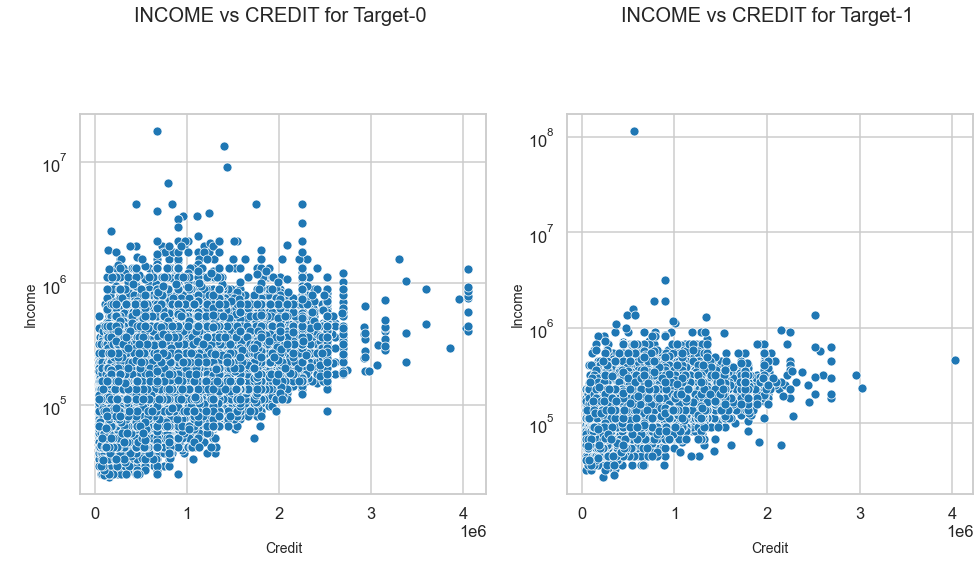

In [62]:
#Potting scatterplot to find any correlations and to check trends in the dataset, in log,

plt.figure(figsize=[16,7])

plt.subplot(1,2,1)
sns.scatterplot(target0_df.AMT_CREDIT, target0_df.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-0 \n',fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit',fontsize=14)
plt.ylabel('\nIncome',fontsize=14)

plt.subplot(1,2,2)
sns.scatterplot(target1_df.AMT_CREDIT, target1_df.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-1 \n',fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit',fontsize=14)
plt.ylabel('\nIncome',fontsize=14)

plt.show()

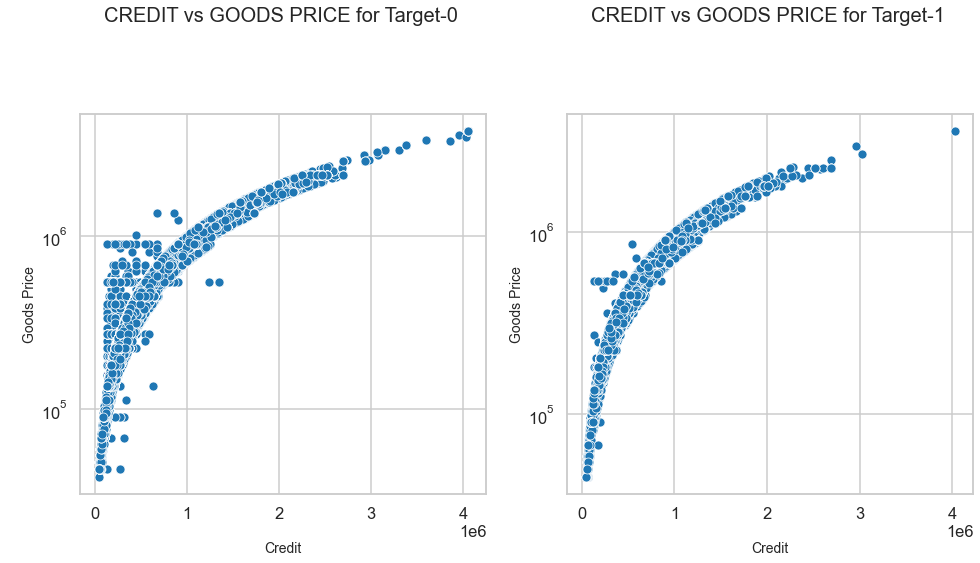

In [63]:
#Potting scatterplot to find any correlations and to check trends in the dataset, 

plt.figure(figsize=[16,7])

plt.subplot(1,2,1)
sns.scatterplot(x='AMT_CREDIT', y='AMT_GOODS_PRICE', data=target0_df)
plt.title('CREDIT vs GOODS PRICE for Target-0 \n',fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit',fontsize=14)
plt.ylabel('\nGoods Price',fontsize=14)

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_CREDIT', y='AMT_GOODS_PRICE', data=target1_df)
plt.title('CREDIT vs GOODS PRICE for Target-1 \n',fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit',fontsize=14)
plt.ylabel('\nGoods Price',fontsize=14)

plt.show()

<b>Conclusion from the graph</b>

With the scatter plot, we can determine that AMT CREDIT and AMT GOODS PRICE are highly correlated, which means if increase in goods price the credit increased directly and vice versa

# Finding Outliers

<b>Univariate Analysis</b>

   <b>For Target=0</b>

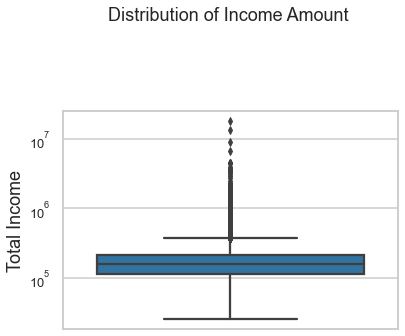

In [64]:
#Disturbution of Income Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target0_df, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks(fontsize=13)
plt.ylabel('Total Income', fontsize=18)
plt.title('Distribution of Income Amount \n', fontsize=18)

plt.show()

<b>Conclusion from the graph</b>

1. There seems to be an equal distribution of the income amount of the clients.
2. Also, some of the outliers present in the dataset.

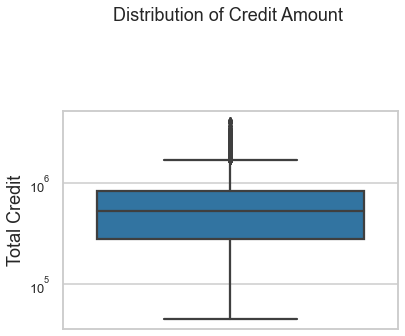

In [65]:
#Disturbution of Credit Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target0_df, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=13)
plt.ylabel('Total Credit', fontsize=18)
plt.title('Distribution of Credit Amount \n', fontsize=18)

plt.show()

<b>Conclusion from the graph</b>

1. The first quartile is bigger than the third quartile, that means most of the client credit lies in the first quartile.
2. There Seems some outliers in the Credit boxplot.

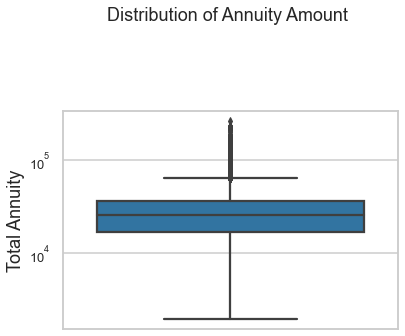

In [66]:
#Disturbution of Annuity,

sns.set_style('whitegrid')

sns.boxplot(data=target0_df, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=13)
plt.ylabel('Total Annuity', fontsize=18)
plt.title('Distribution of Annuity Amount \n', fontsize=18)

plt.show()

<b>Conclusion from the graph</b>

1. The first quartile is bigger than the third quartile.
2. There seems some outliers in the Annuity boxplot.

<b>For Target=1</b>

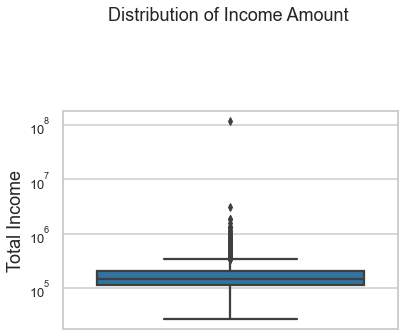

In [67]:
#Disturbution of Income Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target1_df, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks(fontsize=13)
plt.ylabel('Total Income', fontsize=18)
plt.title('Distribution of Income Amount \n', fontsize=18)

plt.show()

<b>Conclusion from the graph</b>

1. There seems a significant outlier in the Income dataset.
2. Most of the income of the client lies in the third quartile.

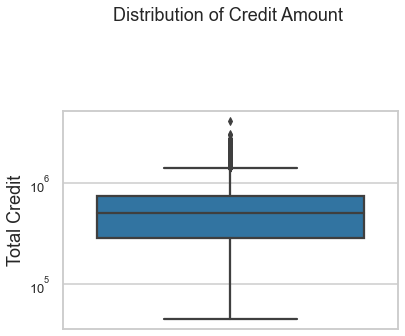

In [68]:
#Disturbution of Credit Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target1_df, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=13)
plt.ylabel('Total Credit', fontsize=18)
plt.title('Distribution of Credit Amount \n', fontsize=18)

plt.show()

<b>Conclusion from the graph</b>

1. The first quartile is bigger than the third quartile, that means most of the client credit lies in the first quartile.
2. There seems some outliers in the credit boxplot.

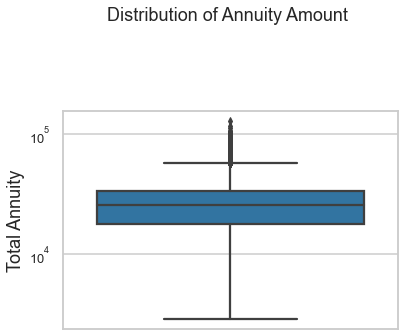

In [69]:
#Disturbution of Annuity,

sns.set_style('whitegrid')

sns.boxplot(data=target1_df, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=13)
plt.ylabel('Total Annuity', fontsize=18)
plt.title('Distribution of Annuity Amount \n', fontsize=18)

plt.show()

<b>Conclusion from the graph</b>

1. The first quartile is bigger than the third quartile.
2. There seems some outliers in the Annuity boxplot

# Multivariate Analysis

<b>Target=0</b>

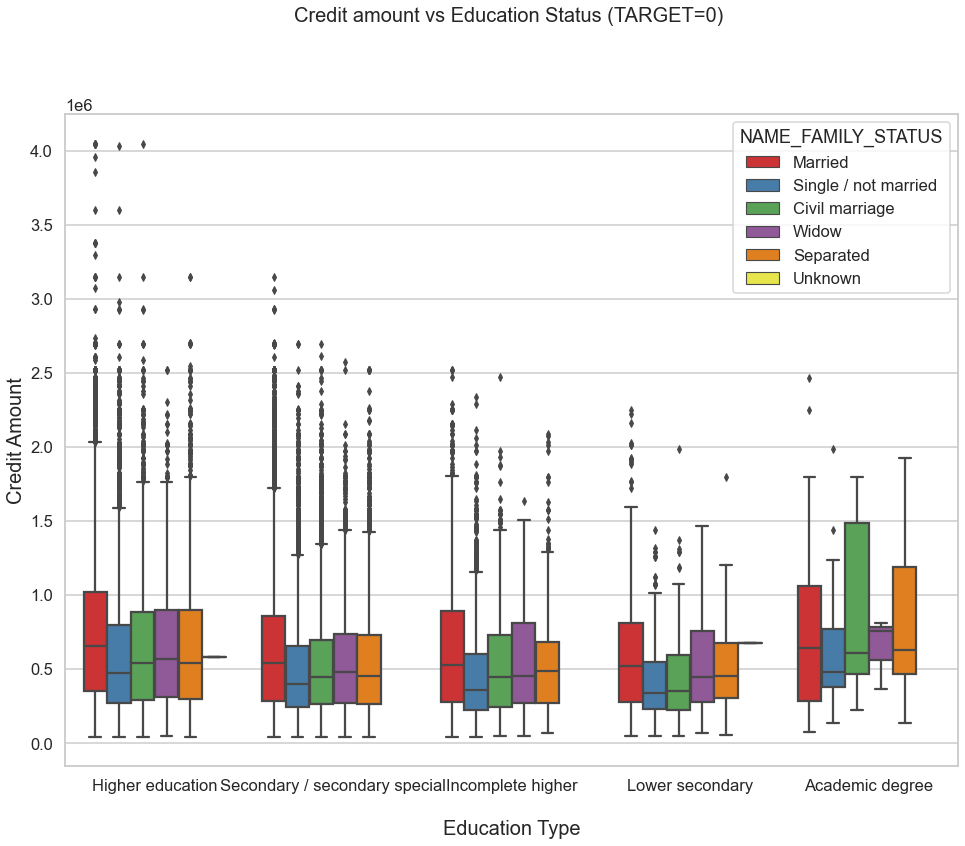

In [70]:
# Box plotting for the Target=0, Credit Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue='NAME_FAMILY_STATUS', orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET=0) \n', fontsize=20)
            
plt.show()

<b>Conclusion from the graph</b>

From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated of Academic degree education are having higher number of credits than others. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outers Civil marriage for Academic degree is having most of the credits in the third quartile

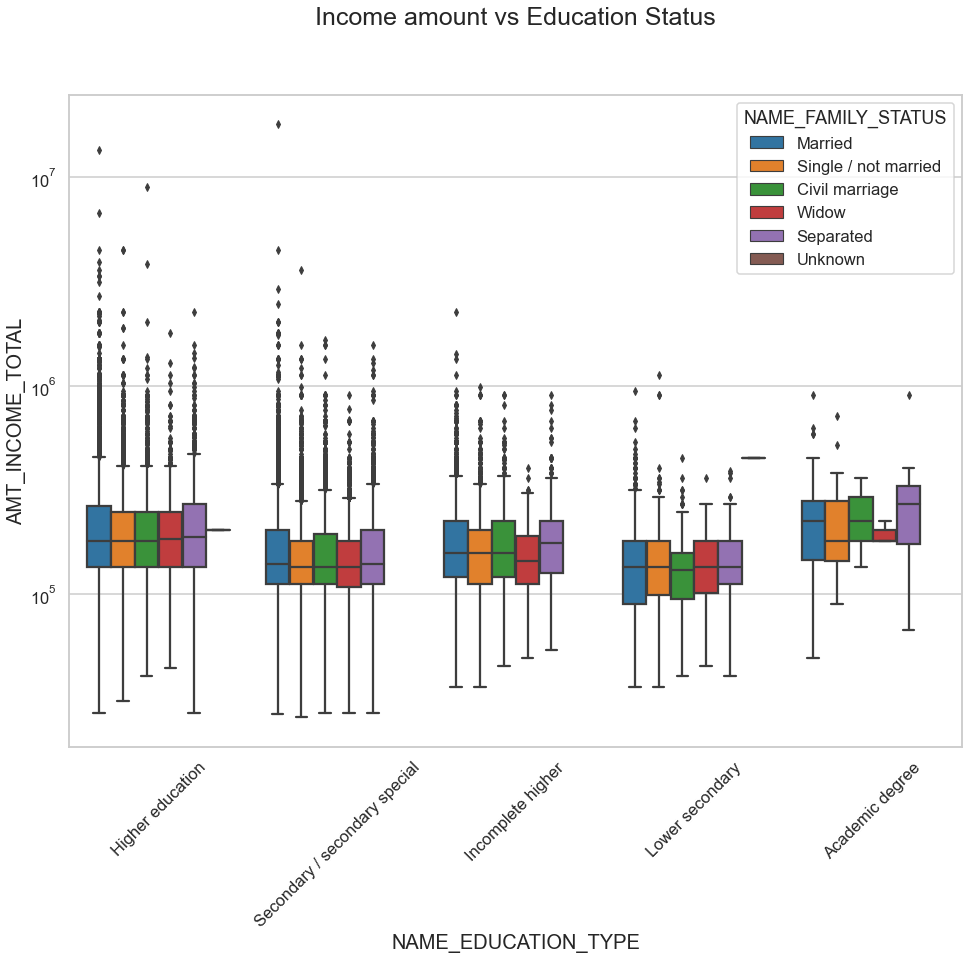

In [71]:
# Box plotting for the Target=0, Income Amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

<b>Conclusion from the graph</b>

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.

<b>Target= 1</b>

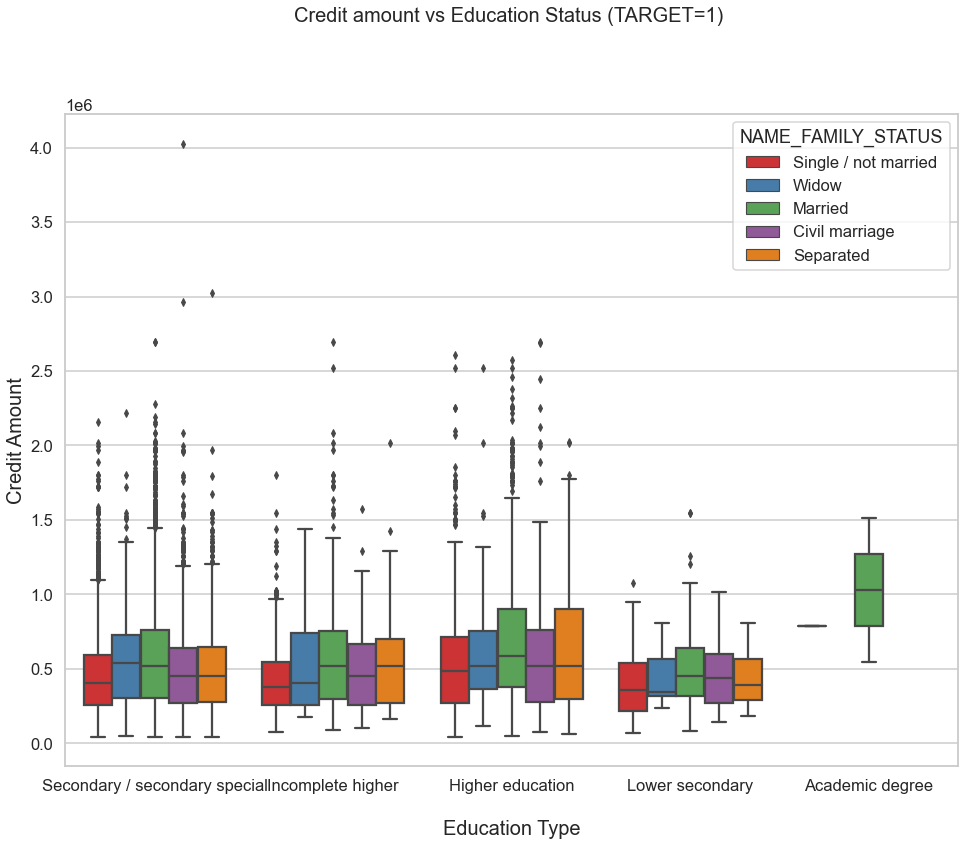

In [72]:
# Box plotting for the Target=1, Credit Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue='NAME_FAMILY_STATUS', orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET=1) \n', fontsize=20)
            
plt.show()

<b>Conclusion from the graph</b>

Quite similar with Target 0 From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

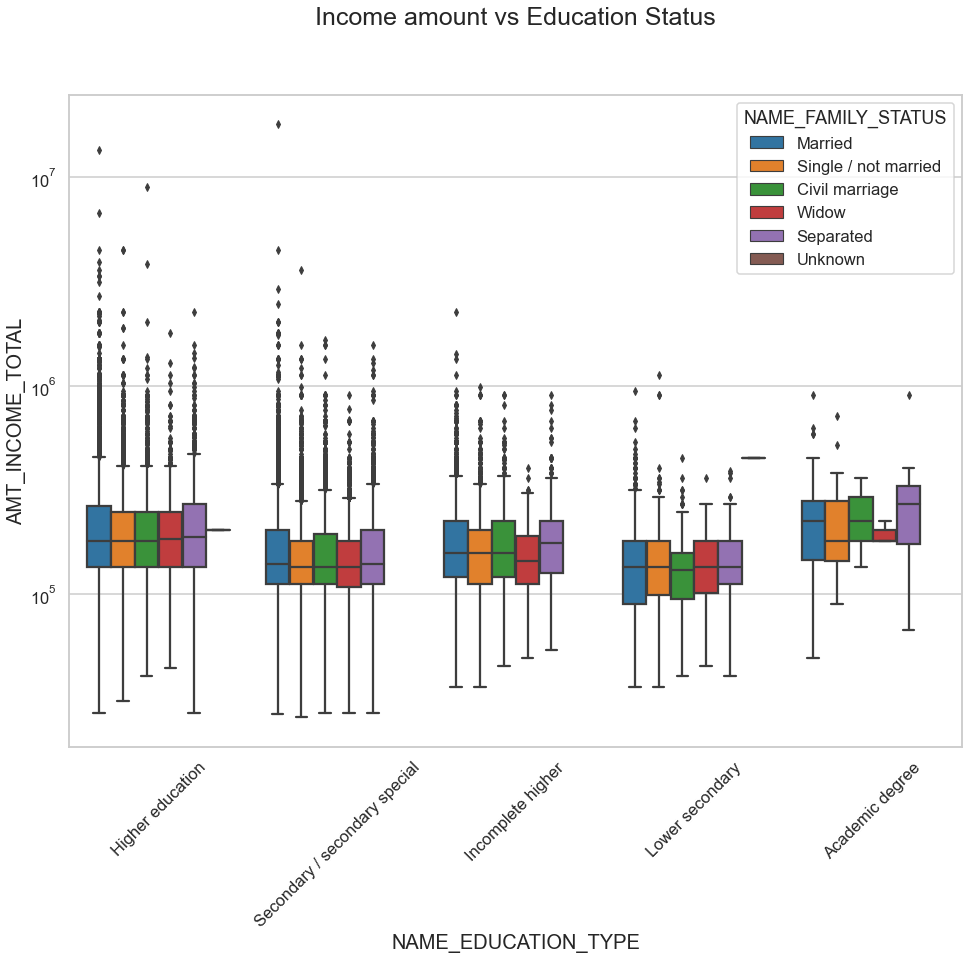

In [73]:
# Box plotting for the Target=1, Income Amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

<b>Conclusion from the graph</b>

Have some similarity with Target0, From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary are have less income amount than others.

# Working on Previous_application Dataset

In [74]:
# Reading the dataset
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


In [75]:
#Checking for the null values again in the dataset,
round((100*df1.isnull().sum()/len(df1)),2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

In [76]:
# Checking the NAME_CASH_LOAN_PURPOSE column for any unique data,
df1.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [77]:
#Removing the 'XNA' and 'XAP' column values from the column,
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [78]:
# Rechecking the NAME_CASH_LOAN_PURPOSE column for any unique data,
df1.NAME_CASH_LOAN_PURPOSE.value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

# Merging the two datasets, i.e. Application dataset and previous application dataset

In [79]:
# Now merging the Application dataset with previous appliaction dataset
new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_APPLICATION,AMT_CREDITx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799,-3015,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,0,0,0,0,0,0,"75000,100000",150000-200000,1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266,-3787,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,0,0,0,1,0,5,275000-300000,650000-700000,1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557,-3557,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,2.0,0.0,2.0,0.0,0,0,0,0,1,1,350000-375000,700000-750000,1077565,Cash loans,1350000.0,1487214.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236,-4292,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0,0,0,1,0,1,175000-200000,500000-550000,1223113,Cash loans,337500.0,407911.5,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236,-4292,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0,0,0,1,0,1,175000-200000,500000-550000,1529558,Cash loans,450000.0,555723.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low


In [80]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [81]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

# Performing univariate analysis

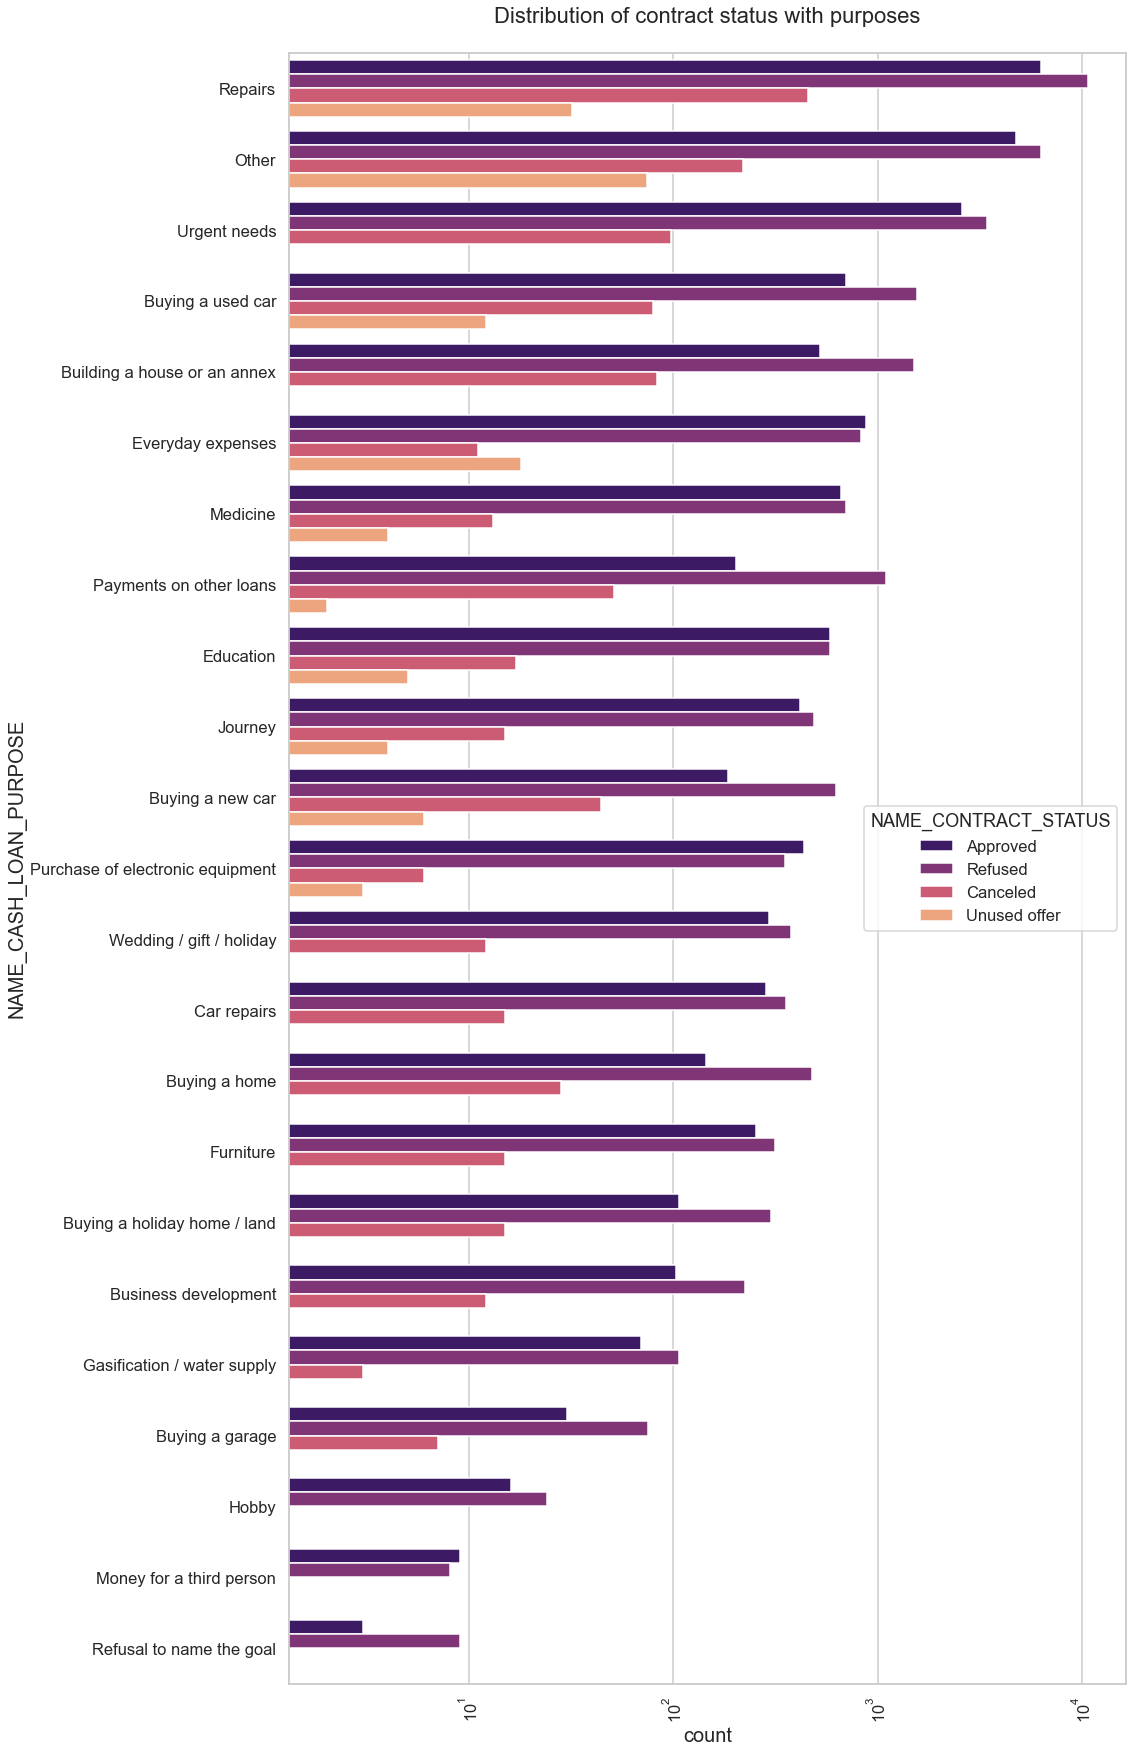

In [82]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma') 

<b>Conclusion from the graph</b>

1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection
3. Paying other loans and buying a new car is having significant higher rejection than approves.

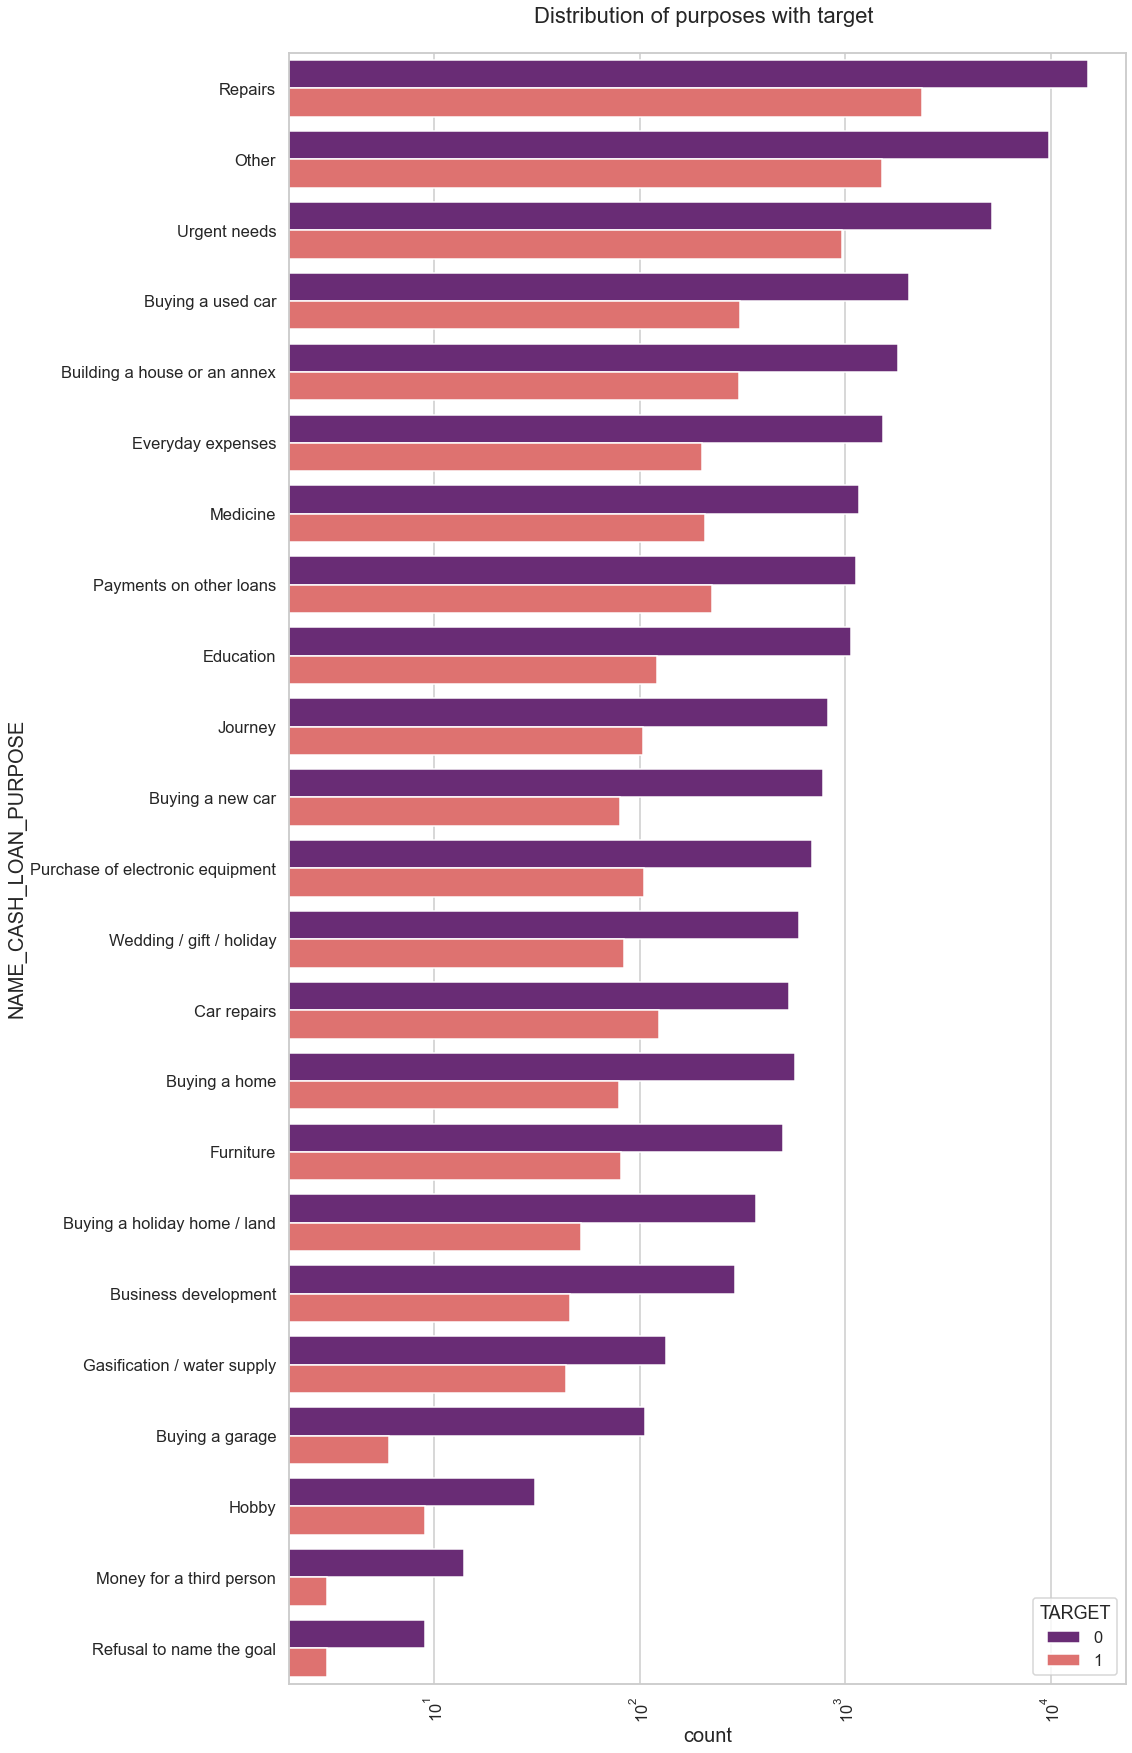

In [83]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

<b>Conclusion from the graph</b>

1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business development', 'Buying land','Buying a new car' and 'Education'
  
  Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

<b>Performing bivariate analysis</b>



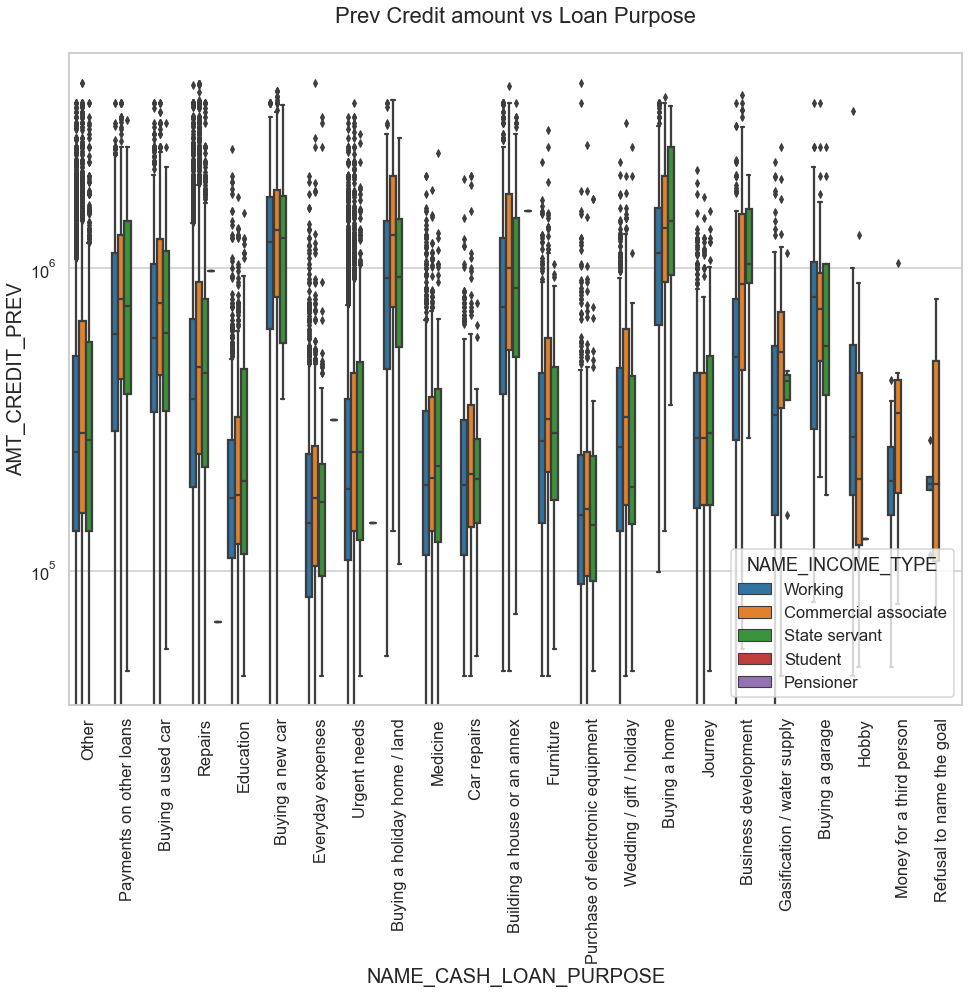

In [84]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

<b>Conclusion from the graph</b>

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.

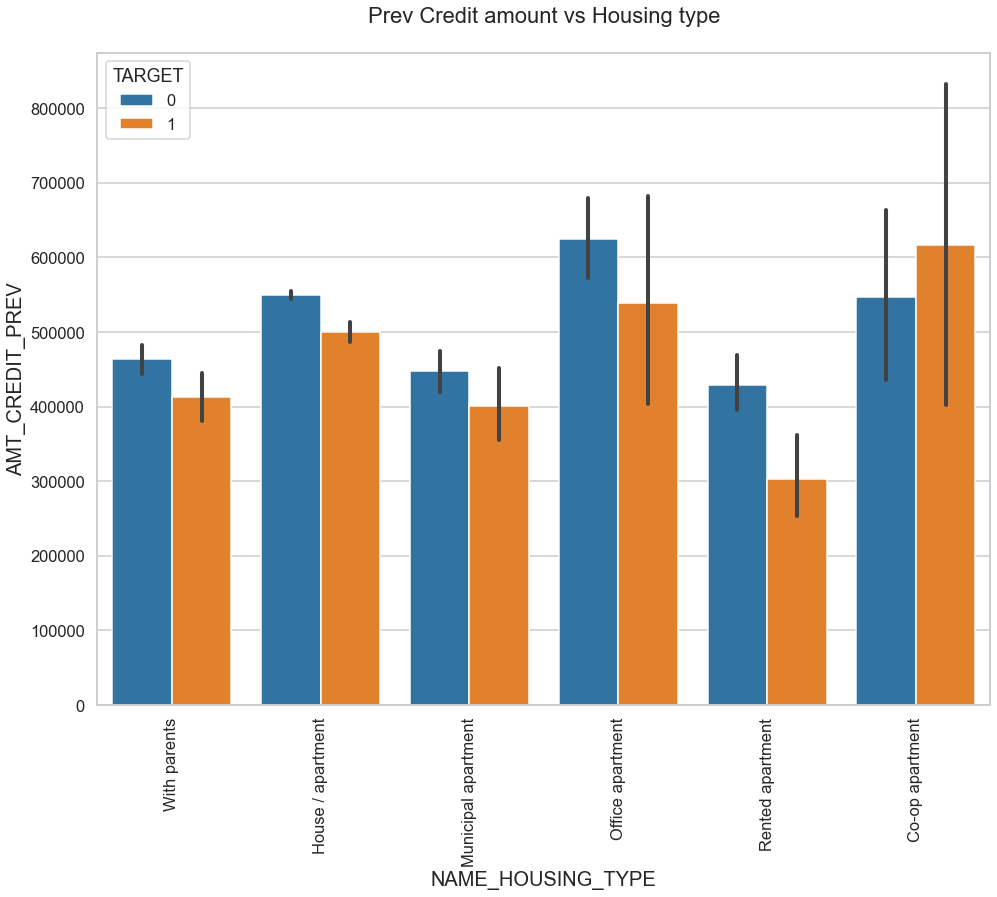

In [85]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

<b>Conclusion from the graph</b>

Here for Housing type, office apartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\apartment or municipal apartment for successful payments.

# CONCLUSION

<b>1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

<b>2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

<b>3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

<b>4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.</b>
 
<b>5. Working people especially female employees are the best target for the loans.